In [112]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import datetime
import os


In [113]:
def model(input_shape):
    width, height = input_shape[0], input_shape[1] 
    if K.image_data_format() == 'channels_first':
        input_shape = (3, width, height)
    else:
        input_shape = (width, height, 3)

    network =Sequential()
    print(input_shape)
    #first layer
    network.add(Conv2D( 64,
                               3, 
                               padding='same', 
                               input_shape = input_shape,
                               activation='relu'
                             ))
    network.add(Conv2D( 64,
                               3, 
                               padding='same', 
                               input_shape = input_shape,
                               activation='relu'
                             ))
    network.add(MaxPooling2D(pool_size=2, strides=(2,2)))
    
    #Second layer
    network.add(Conv2D( 128,
                               3,  
                               activation='relu'
                             ))
    network.add(MaxPooling2D(pool_size=2, strides=(2,2)))
    
    #third layer
    network.add(Conv2D( 256,
                               3,  
                               activation='relu'
                             ))
    
    network.add(MaxPooling2D(pool_size=2, strides=(4,4)))

    #third layer
    network.add(Conv2D( 512,
                               3,  
                               activation='relu'
                             ))
    
    network.add(MaxPooling2D(pool_size=2, strides=(2,2)))


    
    
    network.add(Flatten())
    network.add(Dense(4096))
    network.add(Activation('relu'))
    network.add(Dense(3))
    network.add(Activation('relu'))
    network.add(Activation('softmax'))



    
    return network


In [153]:
VGG = model((224,224))
from keras import optimizers

#Primer modelo
#cnn.compile(loss='mean_squared_error', optimizer='Adam', metrics = ['accuracy'])
#CategoricalCrossentropy
VGG.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

(224, 224, 3)


In [151]:
train_dir = 'data/train'
dev_dir = 'data/dev'
test_dir = ' data/test'
batch_size = 16
nb_train_samples = 6000
epochs = 10
steps = nb_train_samples // batch_size
width, height = 306, 306
nb_validation_samples = 300

r= -4*np.random.rand()
learning_rate = pow(10,r)
validation_steps = nb_validation_samples // batch_size

In [152]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2,0.8],
    rotation_range=20,
)

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    dev_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')
    

Found 7629 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [154]:

VGG.compile(loss='categorical_crossentropy', optimizer= new_optimizer, metrics = ['accuracy','mean_squared_error'])
history = VGG.fit_generator(
        train_generator,
        steps_per_epoch=steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        use_multiprocessing=True,
        workers = 4
    )
dir = 'VGGmodel/'+ str(datetime.datetime.now()) + '/'
if os.path.exists(dir) == False:
    os.mkdir(dir)
    #os.path.exists(dir)
#loaded_model.save(dir + 'modelo.h5')
#loaded_model.save_weights(dir  +'weights.h')

Epoch 1/10
375/375 [==============================] - 82s 218ms/step - loss: 15.6589 - accuracy: 0.2570 - mean_squared_error: 0.2231 - val_loss: 1.0986 - val_accuracy: 0.3299 - val_mean_squared_error: 0.2222
Epoch 2/10
375/375 [==============================] - 80s 213ms/step - loss: 1.0986 - accuracy: 0.2560 - mean_squared_error: 0.2222 - val_loss: 1.0986 - val_accuracy: 0.3451 - val_mean_squared_error: 0.2222
Epoch 3/10
375/375 [==============================] - 78s 208ms/step - loss: 1.0986 - accuracy: 0.2713 - mean_squared_error: 0.2222 - val_loss: 1.0986 - val_accuracy: 0.3239 - val_mean_squared_error: 0.2222
Epoch 4/10
375/375 [==============================] - 79s 210ms/step - loss: 1.0986 - accuracy: 0.2576 - mean_squared_error: 0.2222 - val_loss: 1.0986 - val_accuracy: 0.3415 - val_mean_squared_error: 0.2222
Epoch 5/10
375/375 [==============================] - 78s 209ms/step - loss: 1.0986 - accuracy: 0.2563 - mean_squared_error: 0.2222 - val_loss: 1.0986 - val_accuracy: 0.33

In [145]:
history.history['loss']

[240.8112501707077,
 1.0986123085021973,
 1.0986123085021973,
 1.0986123085021973,
 1.0986123085021973,
 1.0986123085021973,
 1.0986123085021973,
 1.0986123085021973,
 1.0986123085021973,
 1.0986123085021973]

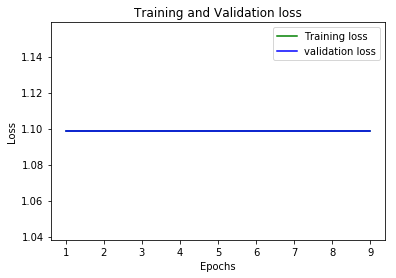

In [158]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
img = plt.gcf()
plt.plot(range(1,epochs), loss_train[1:], 'g', label='Training loss')
plt.plot(range(1,epochs), loss_val[1:], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
img.savefig('VGGimages/training_loss2.png')

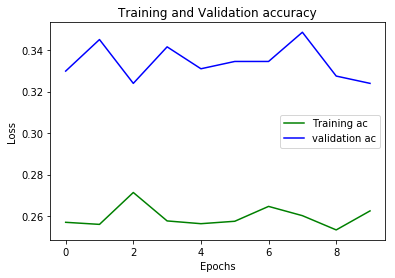

In [159]:
import matplotlib.pyplot as plt
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
img = plt.gcf()
plt.plot(range(0,epochs), acc_train, 'g', label='Training ac') 
plt.plot(range(0,epochs), acc_val, 'b', label='validation ac')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
img.savefig('VGGimages/accuracy2.png')